# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Dataset discussed in this investigation has been acquired from Kaggle, and it contains data collected from mor than 100,000 Medical Appointments booked in Barzil. The main purpose of the collected Data is to assess whether patients did indeed show up for said appointments or not.

#### Dataset General Information:

##### Column Names, Brief Description & Significance:
* **PatientId**: _Patient Identification Number_
* **AppointmentID**: _Appointment Idenftification Number_  
* **Gender**: _Male or Female_ --- Since Females are the greater portion. Useful to assess the assumption and old adage that "Women take more care of their health than Men" 
* **ScheduledDay**: _Set date for the Appointment_
* **AppointmentDay**: _Date where appointment was booked_
* **Age**: _Patient's age at the time of the appointment_ --- Assessment of whether the patient's age is a factor to whether a patient shows up to their appointments
* **Neighbourhood**: _Location of the clinic for the appointment_ --- Assessment of whether the clinic's location is a factor to them showing up to their appointments
* **Scholarship**: _Indicates whether or not the patient is enrolled in the Brasilian welfare program, Bolsa Família_ --- Assessment of whether the financial class of the patients is a factor in whether they keep their appointments or not 
* **Hypertension**: _Whether the patient suffers from Hypertension or not_ --- Assessment of whether this patient condition affects them keeping their appointment or not
* **Diabetes**: _Whether the patient suffers from Diabetes or not_ --- Assessment of whether this patient condition affects them showing up to their appointment or not
* **Alcoholism**: _Whether the patient suffers from Alcoholism or not_ --- Assessment of whether this patient condition affects them showing up to their appointment or not 
* **Handicap**: _Whether the patient suffers from a Handicap or not_ --- Assessment of whether this patient condition affects them showing up to their appointment or not 
* S**MS_received**: _Whether 1 or more Mobile Messages where sent to the patient_ --- Assesment of whether having a text reminder sent to the patient affect whether they showed up to the appointment 
* **No-show**: _Whether patient showed up to the booked appointment_ Main Metric for this Dataset to measure against

> This Dataset contains **110,527** Enteries


### Question(s) for Analysis

* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
* Is the old adage true ? Is Gender really a factor on who has a higher probability for attending ?
* Does the patient's age help us predict whether they will show for their appointments ?
* Does the Patient's Age and whether they suffer from a Chronic Condition affect them showing up to their Appointment ?
* Does the Average Age in a Neighbourhood affect the Attendance Rate ?
* Is Age a factor for those who have a Scholarship when it comes to Attendance ?
* Do SMS Messages play a role in Attendance ?
* Are Clinic Locations a Factor in Patients Attendance ?
* Is Mental Health a factor in Attendance ?

In [3]:
#This was added in order to remove the FutureWarnings presented by Pandas, for a smoother viewing experience
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==1.5.1

#This was not used, as it was not needed when i worked on the Notebook on my Local Machine

<a id='wrangling'></a>
## Data Wrangling

In the following section, I will be cleaning the Data for better readability and to better answer the questions posed earlier.

### General Properties


In [4]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see above a brief summary of all the columns present in the data set, along with the number of total enteries avaiable.

In [6]:
df.shape

(110527, 14)

As seen above, the my original Dataset's shape is `Rows`--> **110,527 Appointments** and `Columns` --> **14** Columns

In [7]:
df.duplicated().sum()

0

We can see here, that the Dataset does not contain any Identically Duplicate Rows

In [8]:
df.duplicated(['AppointmentID']).sum()

0

We can see here that our Dataseta does not include any Appointments that have been entered more than once

In [9]:
df.duplicated(['PatientId']).sum()

48228

We can see that there is a total **48,228** Patients' IDs that have been logged more than once in our Dataset

In [10]:
df.duplicated(['PatientId', 'No-show']).sum()

38710

There are a Total of **38,710** Patient IDs whose `No-Show` Values are the same for all of their enteries, whether they showed up or they didnt. These records will be removed to avoid inflation during the Data Analysis process.


### Data Cleaning


In [11]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received No-show  
0         0           0         0             0      No  
1         0           0         0             0      No  
2         0           0         0             0      No  
3         0           0         0             0      No  
4         1           0         0             0      No

Two of the Columns names are misspelled and should be corrected.

In [12]:
df.drop_duplicates(['PatientId', 'No-show'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71817 entries, 0 to 110524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       71817 non-null  float64
 1   AppointmentID   71817 non-null  int64  
 2   Gender          71817 non-null  object 
 3   ScheduledDay    71817 non-null  object 
 4   AppointmentDay  71817 non-null  object 
 5   Age             71817 non-null  int64  
 6   Neighbourhood   71817 non-null  object 
 7   Scholarship     71817 non-null  int64  
 8   Hypertension    71817 non-null  int64  
 9   Diabetes        71817 non-null  int64  
 10  Alcoholism      71817 non-null  int64  
 11  Handicap        71817 non-null  int64  
 12  SMS_received    71817 non-null  int64  
 13  No-show         71817 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 8.2+ MB


As discussed in the previous section, I have now dropped the extra **38,710** Patient IDs whose No-Show Values are the same for all of their enteries

In [13]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [14]:
df.head()

Gender  Age      Neighbourhood  Scholarship  Hypertension  Diabetes  \
0      F   62    JARDIM DA PENHA            0             1         0   
1      M   56    JARDIM DA PENHA            0             0         0   
2      F   62      MATA DA PRAIA            0             0         0   
3      F    8  PONTAL DE CAMBURI            0             0         0   
4      F   56    JARDIM DA PENHA            0             1         1   

   Alcoholism  Handicap  SMS_received No-show  
0           0         0             0      No  
1           0         0             0      No  
2           0         0             0      No  
3           0         0             0      No  
4           0         0             0      No

Several Columns contain information that are not relevant to our questions, such as: `PatientID`, `AppointmentID`, `ScheduledDay` and `AppointmentDay`. These columns will be removed from the Dataset

In [15]:
df['No-show'].value_counts()

No     54154
Yes    17663
Name: No-show, dtype: int64

The column `No-show`'s name and value are not very intutive. I am going to change the Column Name next, and also adjust the Column values accordingly to better reflect its new nomenclature.

I am using the above cell to make sure that when I change the values of the column, the change is actually done correctly without missing any of the values.

In [16]:
df.rename(columns = {'No-show': 'Showed'}, inplace= True)
df.head()

Gender  Age      Neighbourhood  Scholarship  Hypertension  Diabetes  \
0      F   62    JARDIM DA PENHA            0             1         0   
1      M   56    JARDIM DA PENHA            0             0         0   
2      F   62      MATA DA PRAIA            0             0         0   
3      F    8  PONTAL DE CAMBURI            0             0         0   
4      F   56    JARDIM DA PENHA            0             1         1   

   Alcoholism  Handicap  SMS_received Showed  
0           0         0             0     No  
1           0         0             0     No  
2           0         0             0     No  
3           0         0             0     No  
4           0         0             0     No

For the purposes of better calrity, I have changed the "No-show" columns name to "Showed" as it is more intutive.

In [17]:
df['Showed'].replace(to_replace=dict(No="Yes", Yes='No'), inplace=True)
df.head()

Gender  Age      Neighbourhood  Scholarship  Hypertension  Diabetes  \
0      F   62    JARDIM DA PENHA            0             1         0   
1      M   56    JARDIM DA PENHA            0             0         0   
2      F   62      MATA DA PRAIA            0             0         0   
3      F    8  PONTAL DE CAMBURI            0             0         0   
4      F   56    JARDIM DA PENHA            0             1         1   

   Alcoholism  Handicap  SMS_received Showed  
0           0         0             0    Yes  
1           0         0             0    Yes  
2           0         0             0    Yes  
3           0         0             0    Yes  
4           0         0             0    Yes

To better reflect the new column's name, the data has been changed to a more intuive `"Yes" for patients who have showed up to their appointments` and `"No" for patients who have not showed up to their appointments`

In [18]:
df['Showed'].value_counts()

Yes    54154
No     17663
Name: Showed, dtype: int64

In [19]:
df.describe()

Age   Scholarship  Hypertension      Diabetes    Alcoholism  \
count  71817.000000  71817.000000  71817.000000  71817.000000  71817.000000   
mean      36.526978      0.095534      0.195065      0.070958      0.025036   
std       23.378518      0.293954      0.396254      0.256757      0.156235   
min       -1.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.000000      0.000000      0.000000      0.000000      0.000000   
50%       36.000000      0.000000      0.000000      0.000000      0.000000   
75%       55.000000      0.000000      0.000000      0.000000      0.000000   
max      115.000000      1.000000      1.000000      1.000000      1.000000   

           Handicap  SMS_received  
count  71817.000000  71817.000000  
mean       0.020135      0.335561  
std        0.155337      0.472190  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        4.000000      1.000000

In [20]:
df.shape

(71817, 10)

Before moving on to the next section, I am checking the Dataset's Descriptive Statistics to make sure that I have not missed anything. As seen above, their is an annomaly in the `Age` Column, where the `min` is showing that a patient is logged with the age **-1** which is incorrect.

In [21]:
df['Age'].idxmin()

99832

I am using the above line of code in order to identify where exactly is the row of data with the `Age = -1` is located

In [22]:
mask = df.query('Age==-1')
mask

Gender  Age Neighbourhood  Scholarship  Hypertension  Diabetes  \
99832      F   -1         ROMÃO            0             0         0   

       Alcoholism  Handicap  SMS_received Showed  
99832           0         0             0    Yes

And also using this method, to double check that I am targetting the correct Line of Data

In [23]:
df.drop(index=99832 , inplace=True)
df.describe()

Age   Scholarship  Hypertension      Diabetes    Alcoholism  \
count  71816.000000  71816.000000  71816.000000  71816.000000  71816.000000   
mean      36.527501      0.095536      0.195068      0.070959      0.025036   
std       23.378262      0.293956      0.396256      0.256758      0.156236   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.000000      0.000000      0.000000      0.000000      0.000000   
50%       36.000000      0.000000      0.000000      0.000000      0.000000   
75%       55.000000      0.000000      0.000000      0.000000      0.000000   
max      115.000000      1.000000      1.000000      1.000000      1.000000   

           Handicap  SMS_received  
count  71816.000000  71816.000000  
mean       0.020135      0.335566  
std        0.155338      0.472191  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        4.000000      1.000000

In [24]:
df.shape

(71816, 10)

##### Data Wrangling & Clean Up Wrap Up:

* Corrected 2 Spelling Mistakes in the Column Names of the Dataset
* Dropped Columns from Dataset that are supportive of our Data Analysis
* Amended Column `No-show` into a more intutive `Show` along side its values
* Removed erroneous line pertaining to the `Age` column


<a id='eda'></a>
## Exploratory Data Analysis

> All of the below Graphs & Charts have been editted and adjusted to accomadate for Color Blindness.


### Overview:

Visualized overview of our current Dataset:

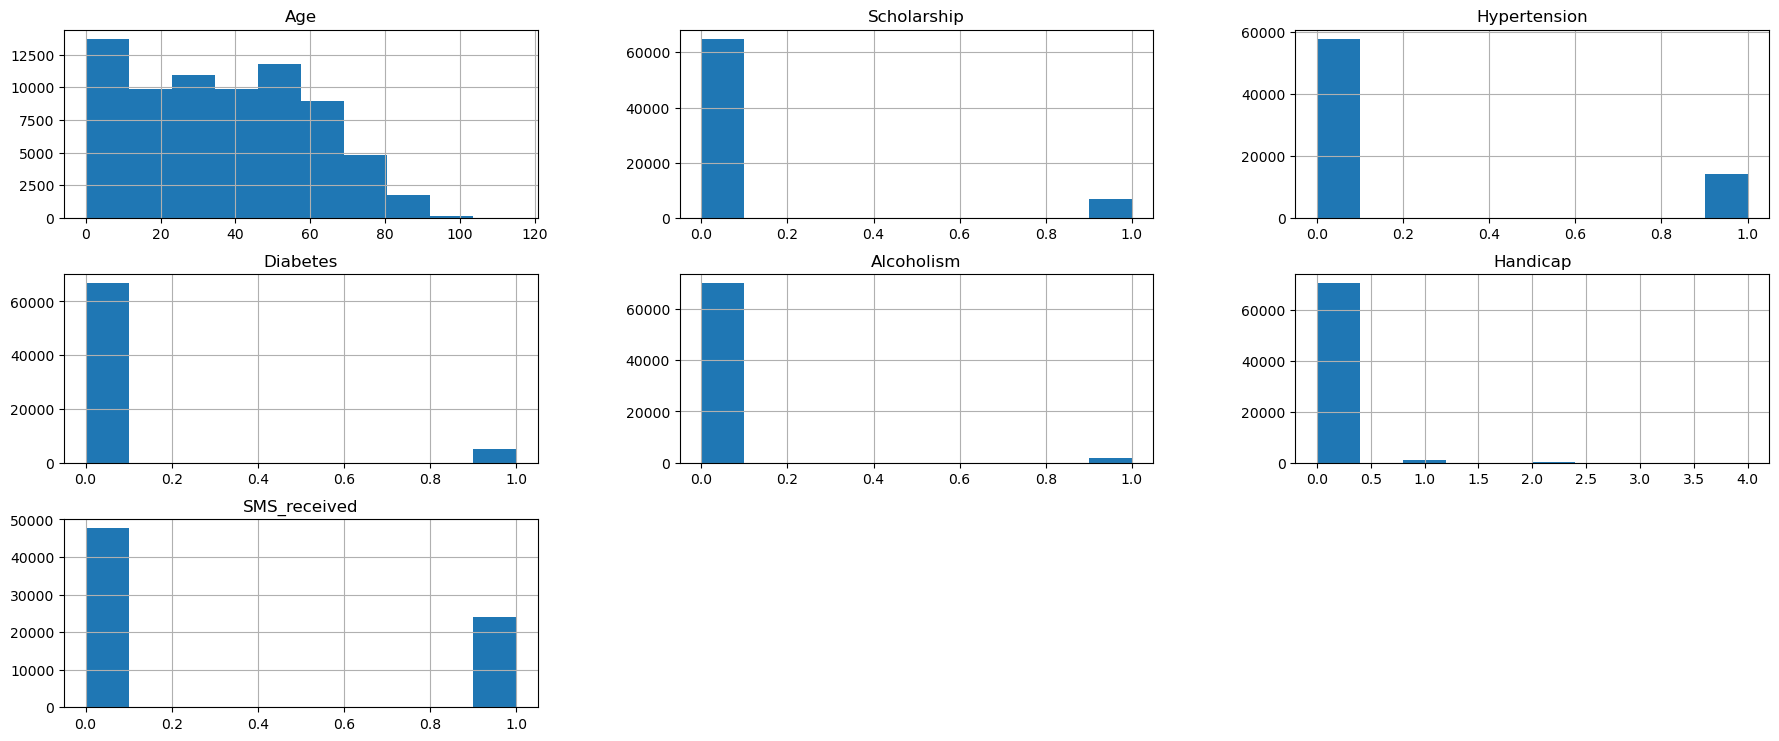

In [25]:
df.hist(figsize=(22,8.8));

In [26]:
show = df.Showed == 'Yes'
no_show = df.Showed == 'No'

df[show].count(), df[no_show].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handicap         54153
 SMS_received     54153
 Showed           54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handicap         17663
 SMS_received     17663
 Showed           17663
 dtype: int64)

### Is the old adage true ? Is Gender really a factor on who has a higher probability for attending ?

In [29]:
def data_setup(df,column_name,show,no_show):

    plt.figure(figsize=[22, 8.8])
    df[column_name][show].hist (alpha= .5, bins= 10, color = 'pink', label = 'Showed Up')
    df[column_name][no_show].hist (alpha= .5, bins= 10, color = 'blue', label = 'Didnt Show Up')
    plt.legend(prop={'size':20});
    plt.title('Is ' + column_name + ' a Factor in Patient Attendance ?', fontsize= 20)
    plt.xlabel(column_name, fontsize= 15)
    plt.ylabel('Patients Total Count', fontsize= 15);

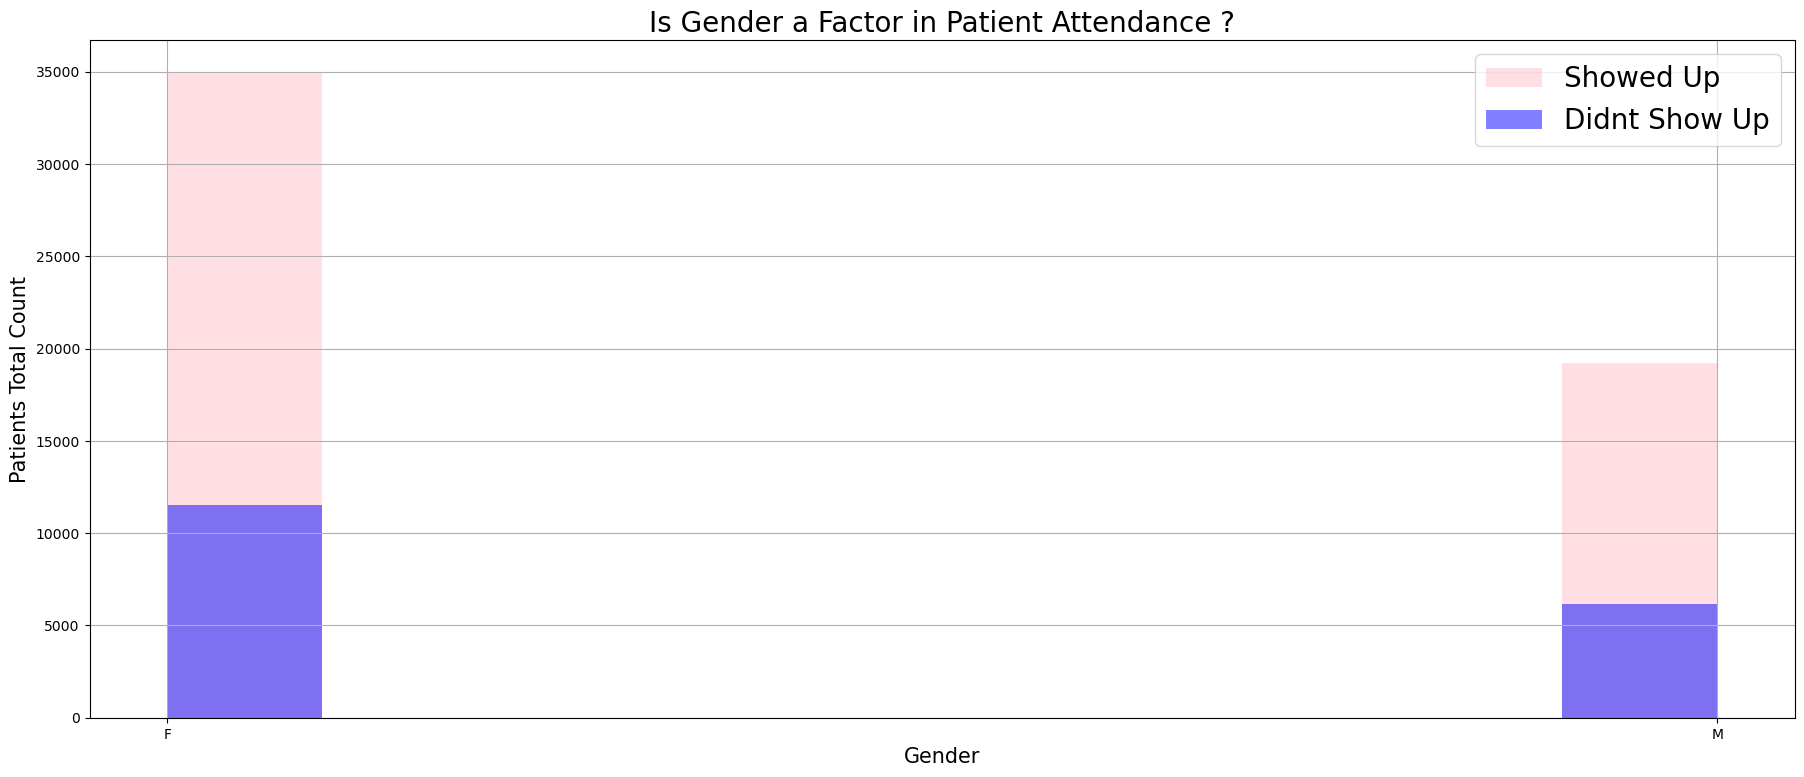

In [30]:
data_setup(df, 'Gender', show, no_show)

The above visual of a Histogram is not a good representation of the data for readability and gives a false sense proportionality to the existing data. Even though the numbers show that the ratios are similar (~3.18 for Females : ~3.17 for Males) between both the show and no show groups.



Below I explore the data as pie charts, which show a better visual representation of the data:

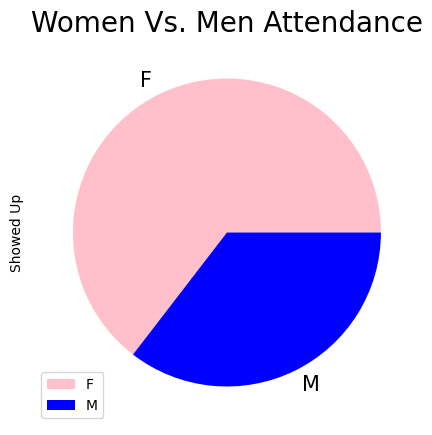

In [31]:
plt.figure(figsize=[15, 5])
df['Gender'][show].value_counts(normalize=True).plot(kind = 'pie', label='Showed Up', colors=['pink', 'blue'], fontsize= 15)
plt.legend(prop={'size':10});
plt.title('Women Vs. Men Attendance', fontsize= 20);

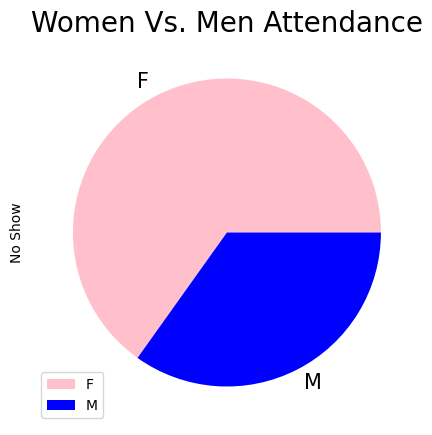

In [32]:
plt.figure(figsize=[15, 5])
df['Gender'][no_show].value_counts(normalize=True).plot(kind = 'pie', label='No Show', colors=['pink', 'blue'], fontsize= 15)
plt.legend(prop={'size':10});
plt.title('Women Vs. Men Attendance', fontsize= 20);

As seen above, both Pie Charts for the number of Women Vs. Men who have showed up and for those who did not, is amost identical. 

We can conlude from this that the old adage, that Women taken better care of their health, is not supported by our data.

### Does the patient's age help us predict whether they will show for their appointments ?

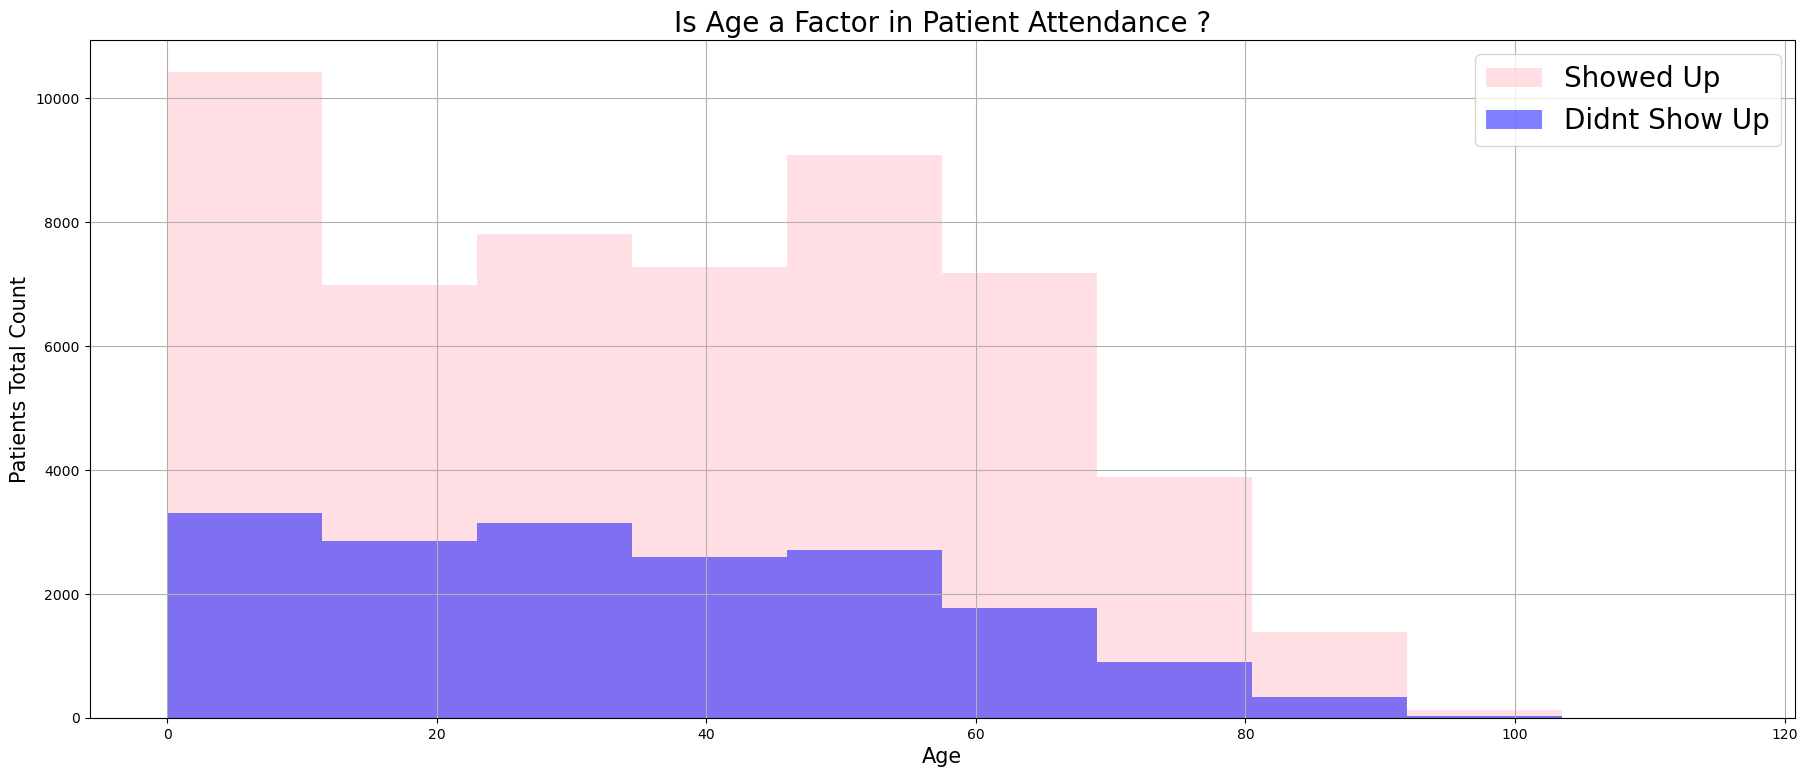

In [36]:
data_setup (df,'Age', show, no_show)

Taking the above into consideration, we can observe that a patient's age is indeed a factor in whether they commit to their appointments or not.

Our two biggest peaks are for children from the Ages of 0 until 10 years old, and adults between 45 to 55 years of age. Older Patients attendance after that, shows a clear and marked dip in their attendance.

### Does the Patient's Age and whether they suffer from a Chronic Condition affect them showing up to their Appointment ?

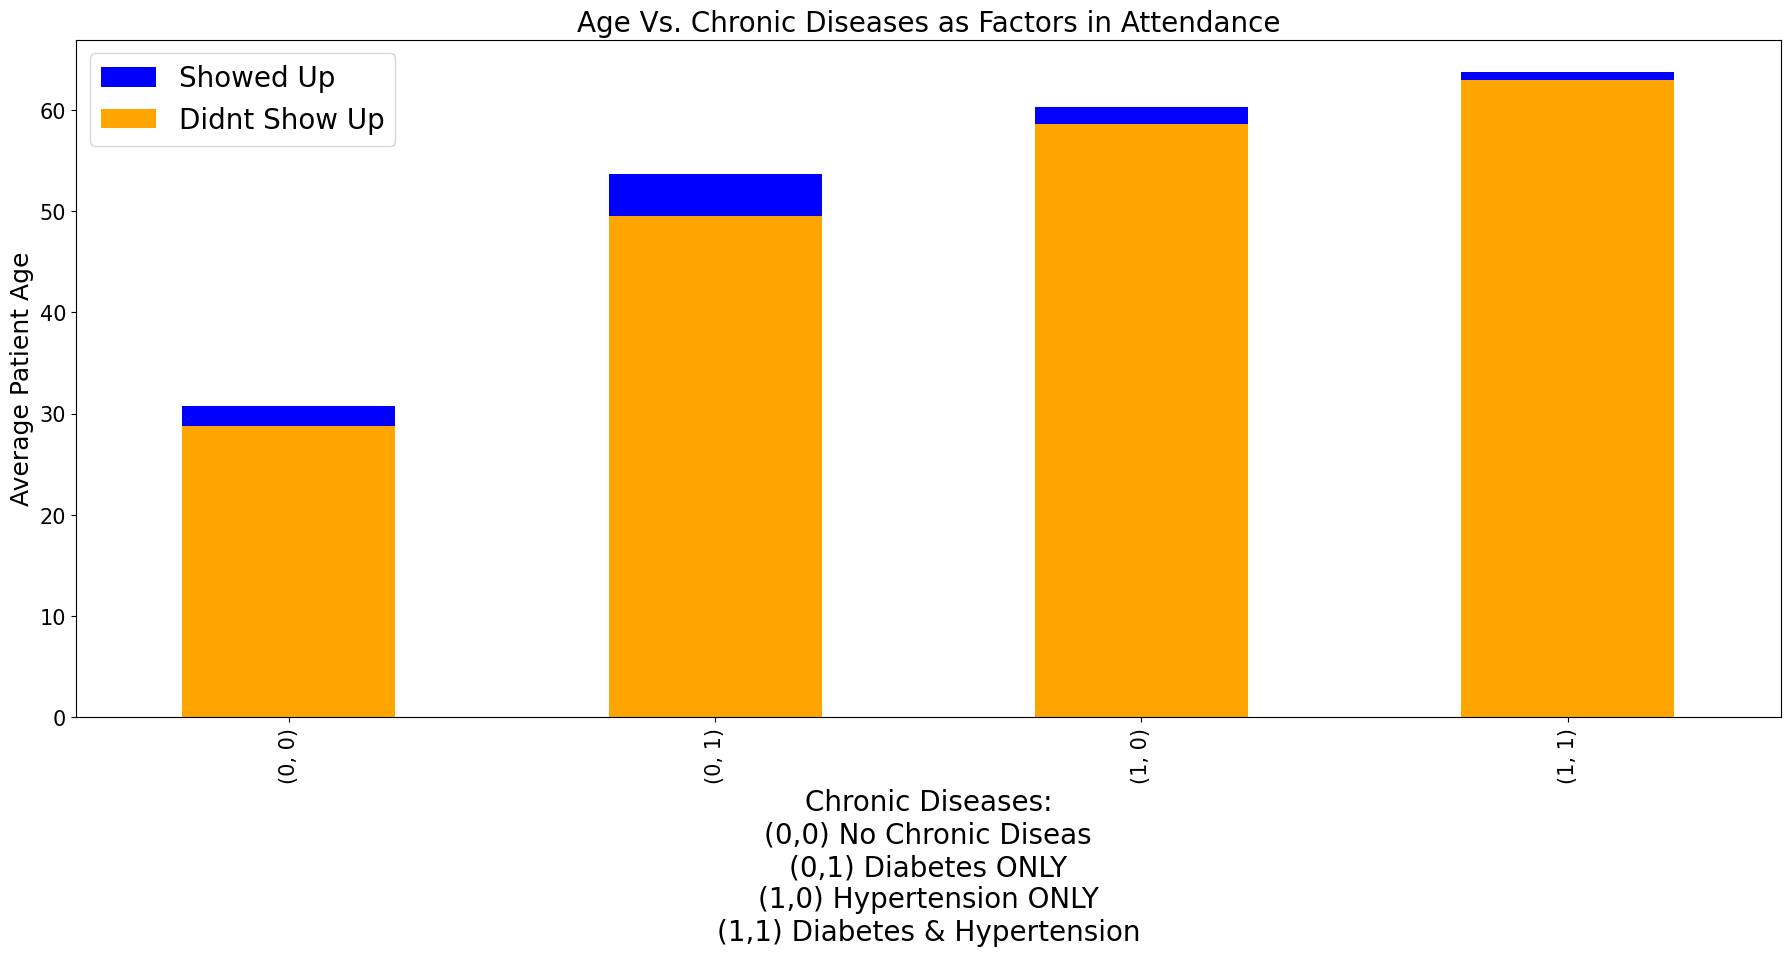

In [37]:
plt.figure(figsize=[22, 8.8])
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind = 'bar', color= 'blue', label= 'Showed Up', fontsize= 15)
df[no_show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind = 'bar', color= 'orange', label= 'Didnt Show Up', fontsize= 15)
plt.legend(prop={'size':20});
plt.title('Age Vs. Chronic Diseases as Factors in Attendance', fontsize= 20)
plt.xlabel('Chronic Diseases:\n(0,0) No Chronic Diseas\n(0,1) Diabetes ONLY\n(1,0) Hypertension ONLY\n(1,1) Diabetes & Hypertension', fontsize= 20)
plt.ylabel('Average Patient Age', fontsize= 18);

Taking the above data into consideration, we can conlude that whether a patient has a chronic condition or not, does not affect their attendance rate by that much. The older they get, the more probable it is that they will not attend their appointments.

In [38]:
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'],df[no_show].groupby(['Hypertension', 'Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

This is further clarfieid by the above information, broken down as follows:

* Patients `not suffering from Chronic Diseases` who `showed up` for their appointments; Average Age is `30`
* Patients `not suffering from Chronic Diseases` who `did not show up` for their appointments; Average Age is `28`

--

* Patients suffering from `Diabetes` who `showed up` for their appointments; Average Age is `53`
* Patients suffering from `Diabetes` who `did not show up` for their appointments; Average Age is `49`

--

* Patients suffering from `Hypertension` who `showed up` for their appointments; Average Age is `60`
* Patients suffering from `Hypertension` who `did not show up` for their appointments; Average Age is `58`

--

* Patients suffering from `both Diabetes & Hypertension` who `showed up` for their appointments; Average Age is `63`
* Patients suffering from `both Diabetes & Hypertension` who `did not show up` for their appointments; Average Age is `62`

We can infer from the above that, while Age has a direct relationship with attendance, Chronic Diseases do not.

### Does the Average Age in a Neighbourhood affect the Attendance Rate ?

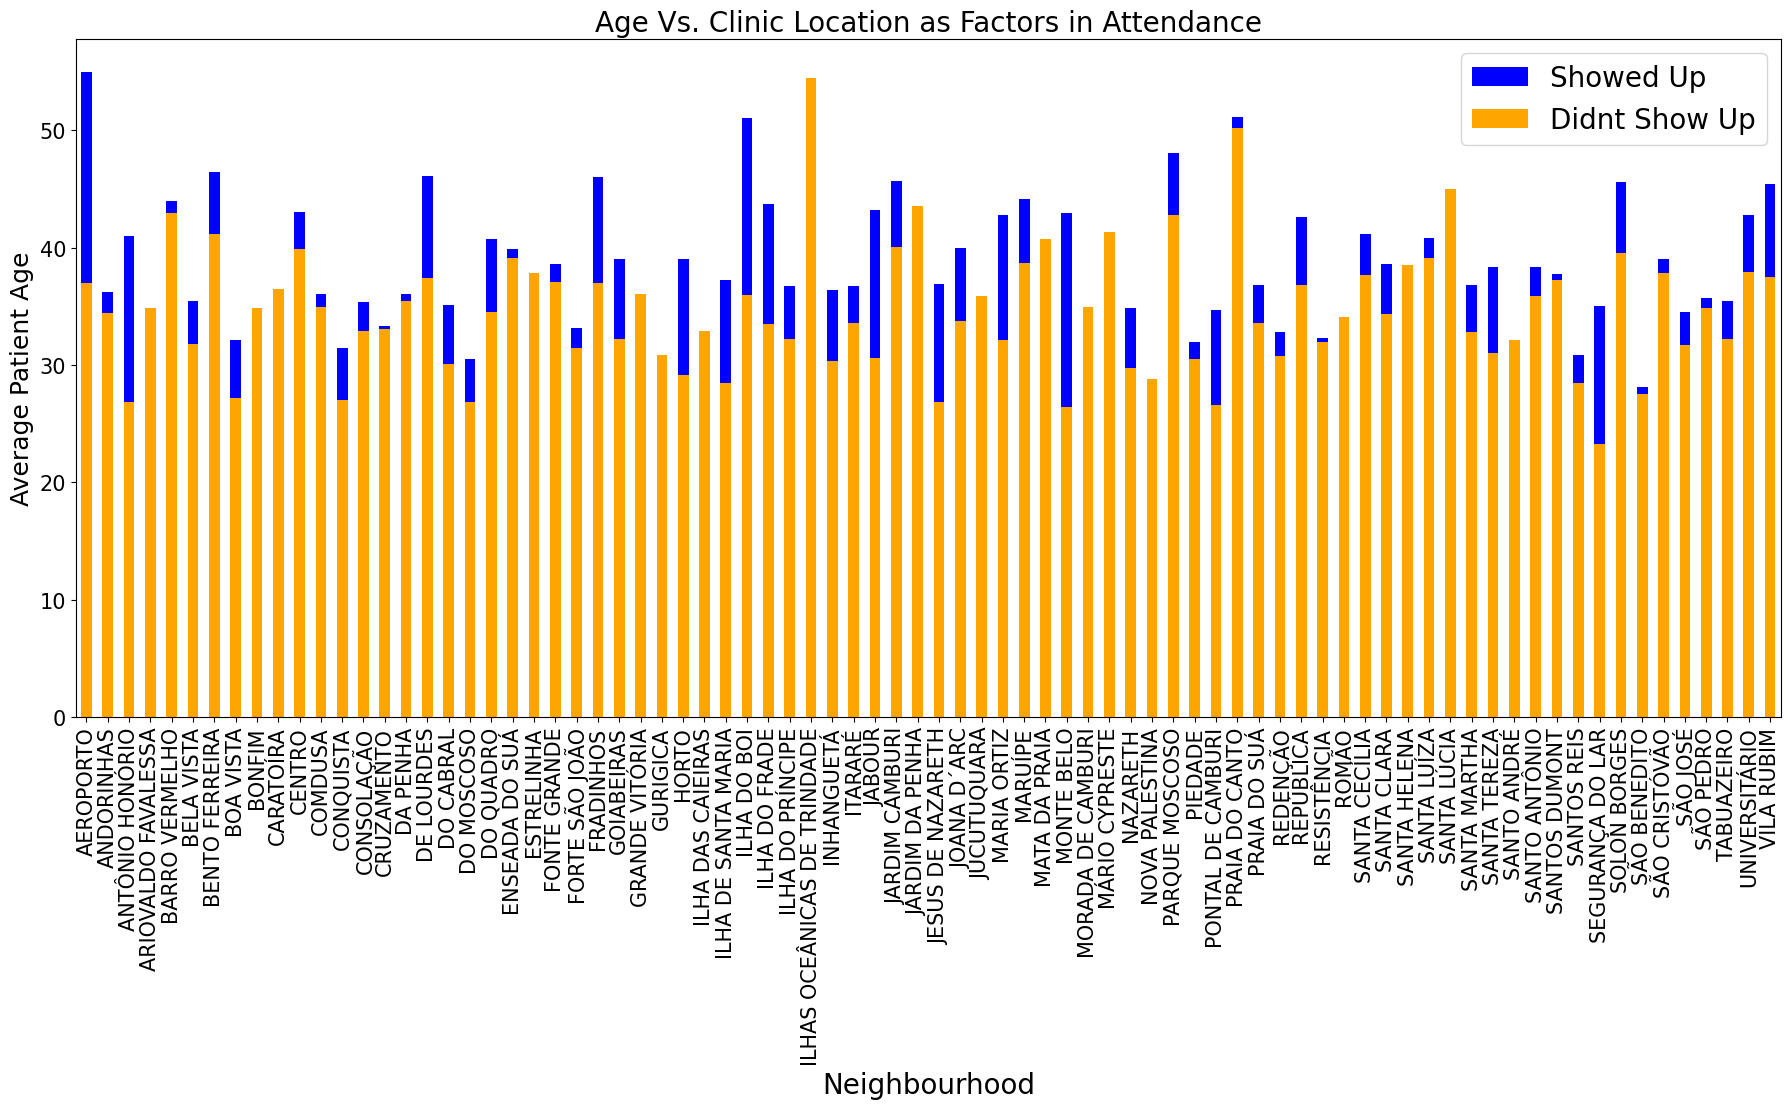

In [39]:
plt.figure(figsize=[22, 8.8])
df[show].groupby(['Neighbourhood']).mean()['Age'].plot(kind = 'bar', color= 'blue', label= 'Showed Up', fontsize= 15)
df[no_show].groupby(['Neighbourhood']).mean()['Age'].plot(kind = 'bar', color= 'orange', label= 'Didnt Show Up', fontsize= 15)
plt.legend(prop={'size':20});
plt.title('Age Vs. Clinic Location as Factors in Attendance', fontsize= 20)
plt.xlabel('Neighbourhood', fontsize= 20)
plt.ylabel('Average Patient Age', fontsize= 18);

As seen here, we can clearly observe a pattern where, the age of the patients depending on their location, factors in whether they will or wont show up for their appointments.

### Is Age a factor for those who have a Scholarship when it comes to Attendance ?

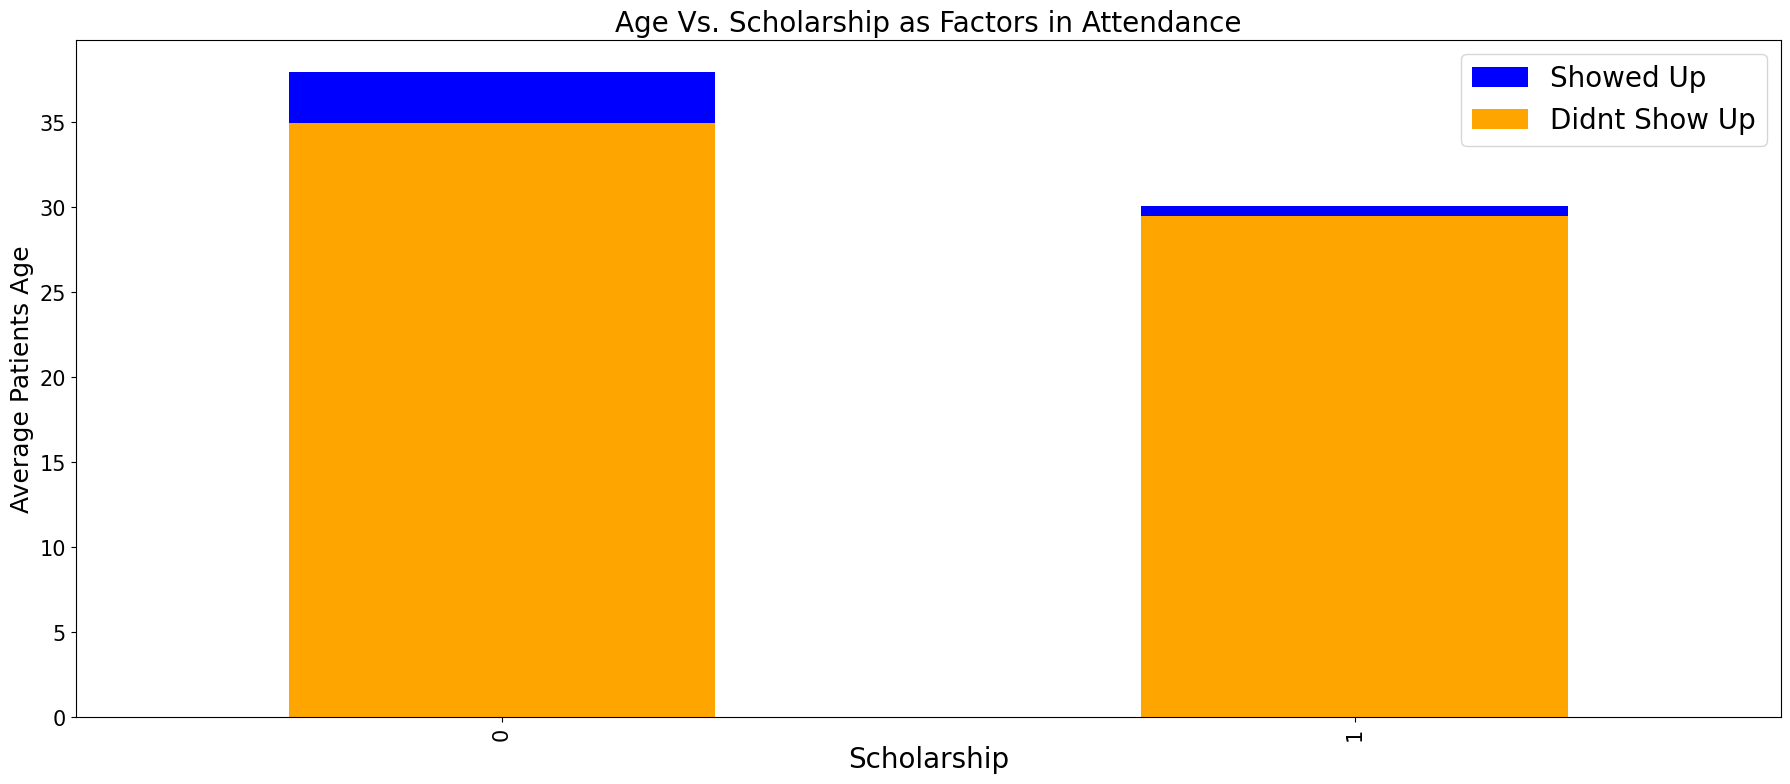

In [40]:
plt.figure(figsize=[22, 8.8])
df[show].groupby(['Scholarship']).mean()['Age'].plot(kind = 'bar', color= 'blue', label= 'Showed Up', fontsize= 15)
df[no_show].groupby(['Scholarship']).mean()['Age'].plot(kind = 'bar', color= 'orange', label= 'Didnt Show Up', fontsize= 15)
plt.legend(prop={'size':20});
plt.title('Age Vs. Scholarship as Factors in Attendance', fontsize= 20)
plt.xlabel('Scholarship', fontsize= 20)
plt.ylabel('Average Patients Age', fontsize= 18);

As seen in the graph above, Age is not a factor to showing up for an appointment when having a Scholarship.

### Do SMS Messages play a role in Attendance ?

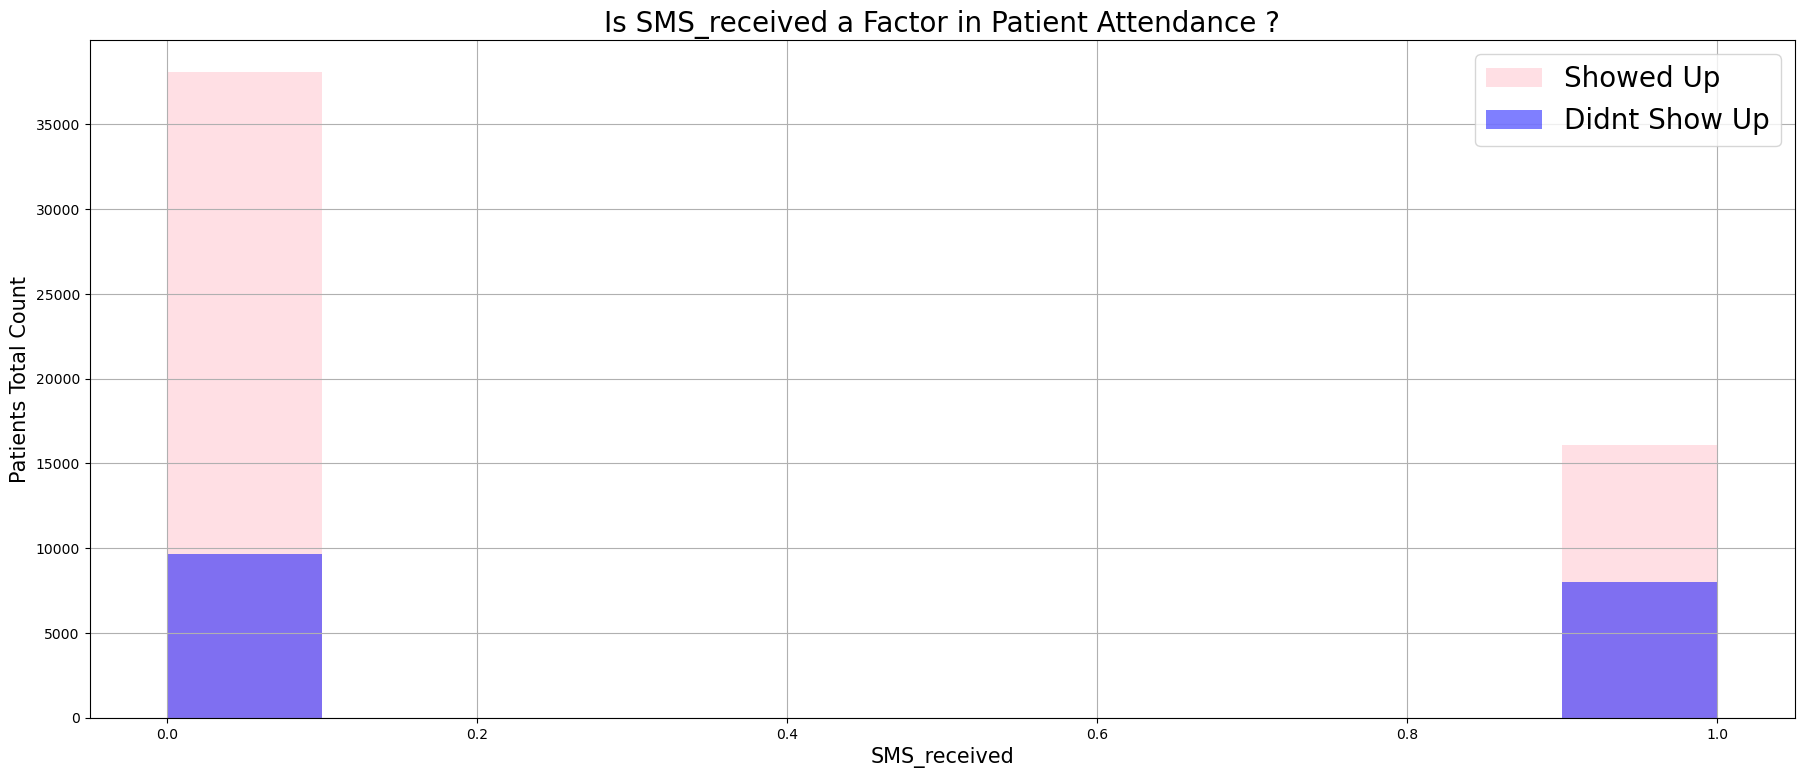

In [41]:
data_setup(df,'SMS_received', show, no_show)

Surprisingly, the number of patients who `did not receive` an SMS and `showed up` for their appointments is far higher, than the number of patients  who `did receive` an SMS and `did not show up` for their appointments.

A review of the SMS Messages sent out to patients is necessary, as it could be that the wording of the SMS Messages is not clear, or gives the impression that another reminder will be sent out to the patients before the date of their appointments.

### Are Clinic Locations a Factor in Patients Attendance ?

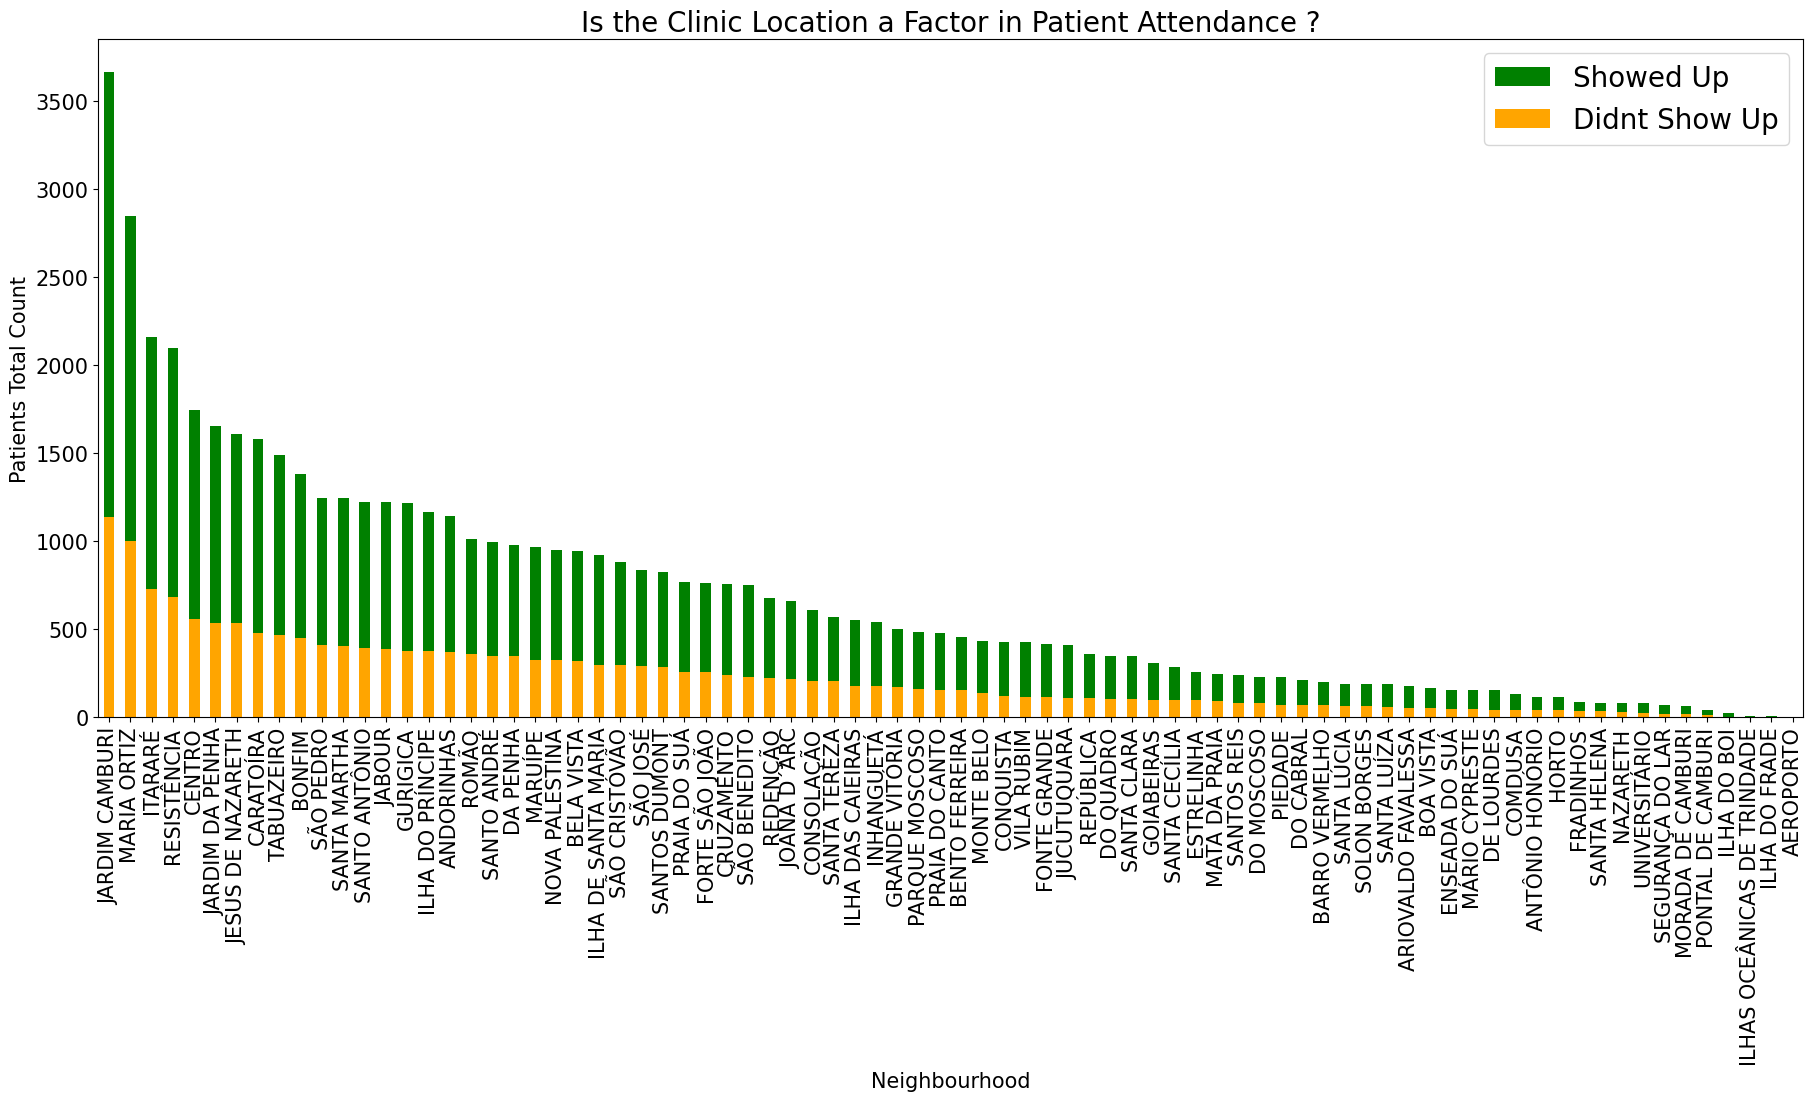

In [42]:
plt.figure(figsize=[22, 8.8])
df['Neighbourhood'][show].value_counts().plot (kind = 'bar', color = 'green', label = 'Showed Up', fontsize = 15)
df['Neighbourhood'][no_show].value_counts().plot (kind = 'bar', color = 'orange', label = 'Didnt Show Up', fontsize = 15)
plt.legend(prop={'size':20});
plt.title('Is the Clinic Location a Factor in Patient Attendance ?', fontsize= 20)
plt.xlabel('Neighbourhood', fontsize= 15)
plt.ylabel('Patients Total Count', fontsize= 15);

As seen above, the location of the Clinc has a great affect on both the number of patients showing up to their appointments and the number of appointments being made in total.

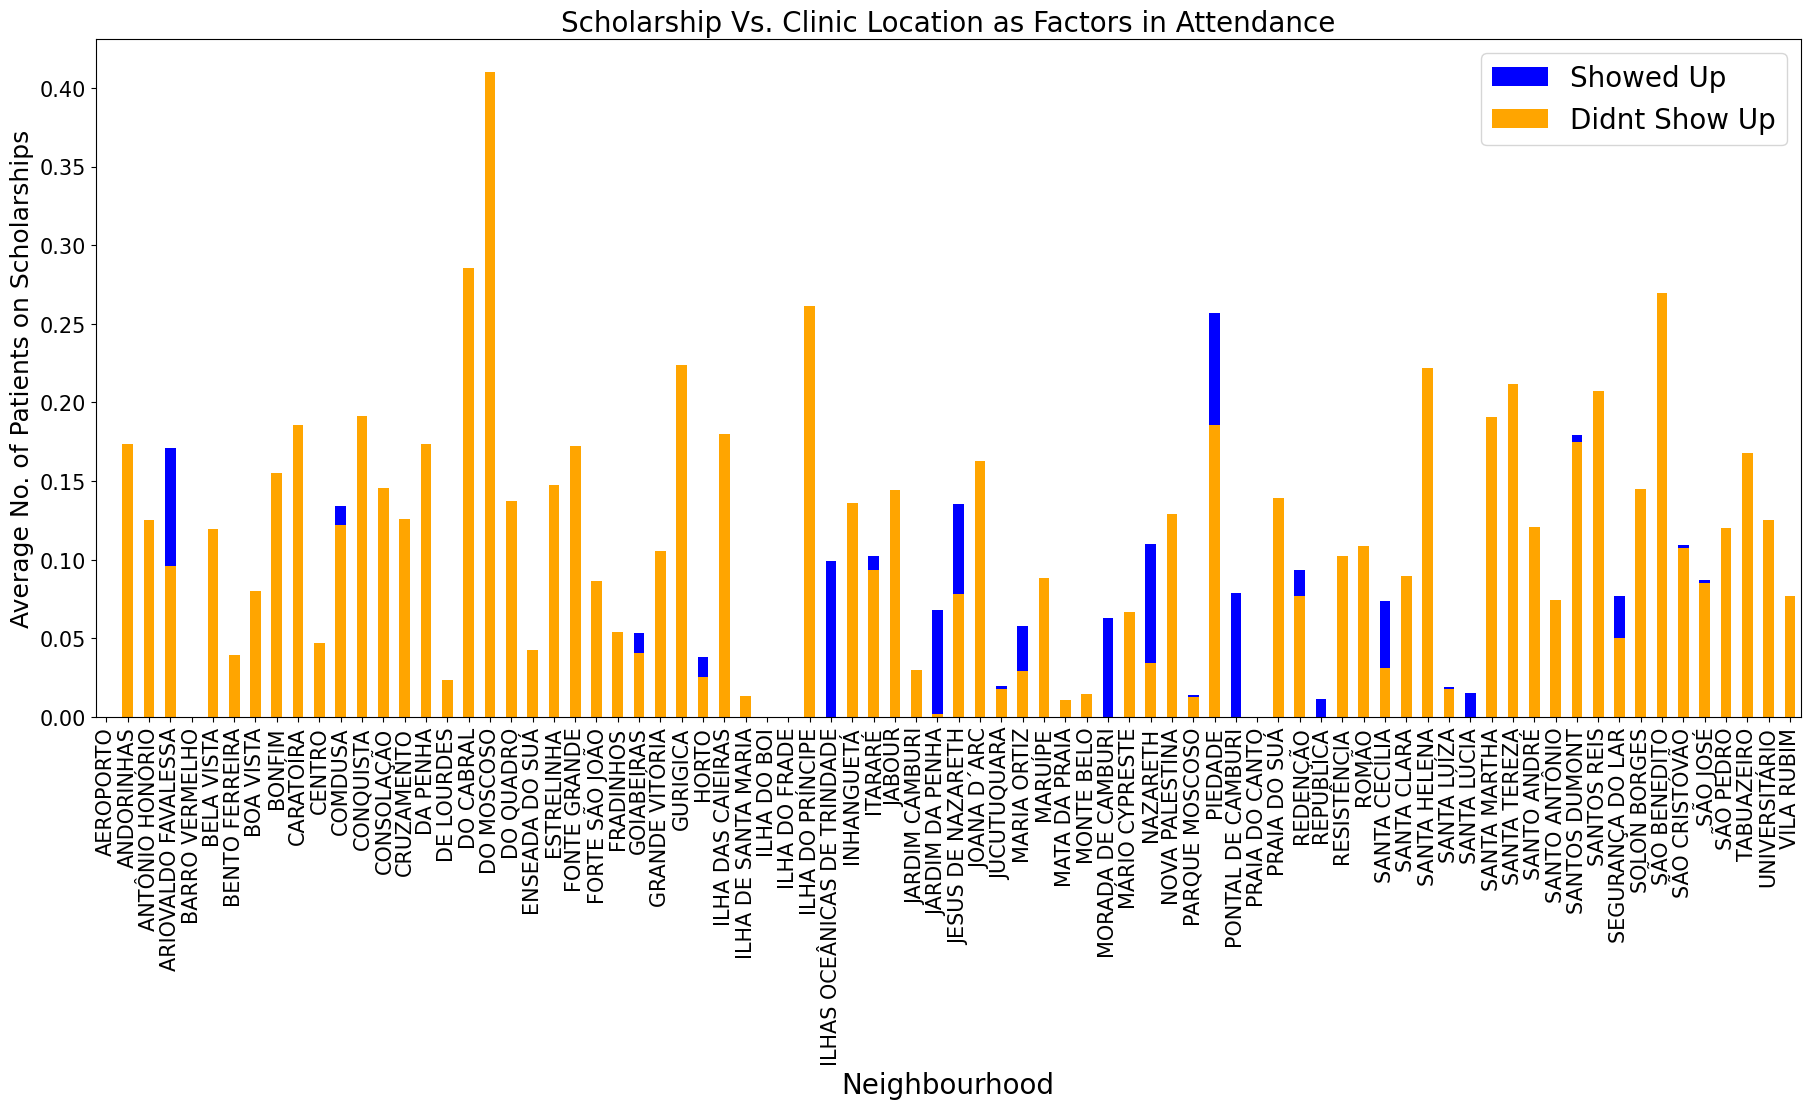

In [43]:
plt.figure(figsize=[22, 8.8])
df[show].groupby(['Neighbourhood']).mean()['Scholarship'].plot(kind = 'bar', color= 'blue', label= 'Showed Up', fontsize= 15)
df[no_show].groupby(['Neighbourhood']).mean()['Scholarship'].plot(kind = 'bar', color= 'orange', label= 'Didnt Show Up', fontsize= 15)
plt.legend(prop={'size':20});
plt.title('Scholarship Vs. Clinic Location as Factors in Attendance', fontsize= 20)
plt.xlabel('Neighbourhood', fontsize= 20)
plt.ylabel('Average No. of Patients on Scholarships', fontsize= 18);

As reflected in the graph above we can see that there is a direct relationship between the patients having a Scholarship and whether or not they attend their appointments. On average, patients with a Scholarship, do not attend their appointments.


### Is Mental Health a factor in Attendance ?

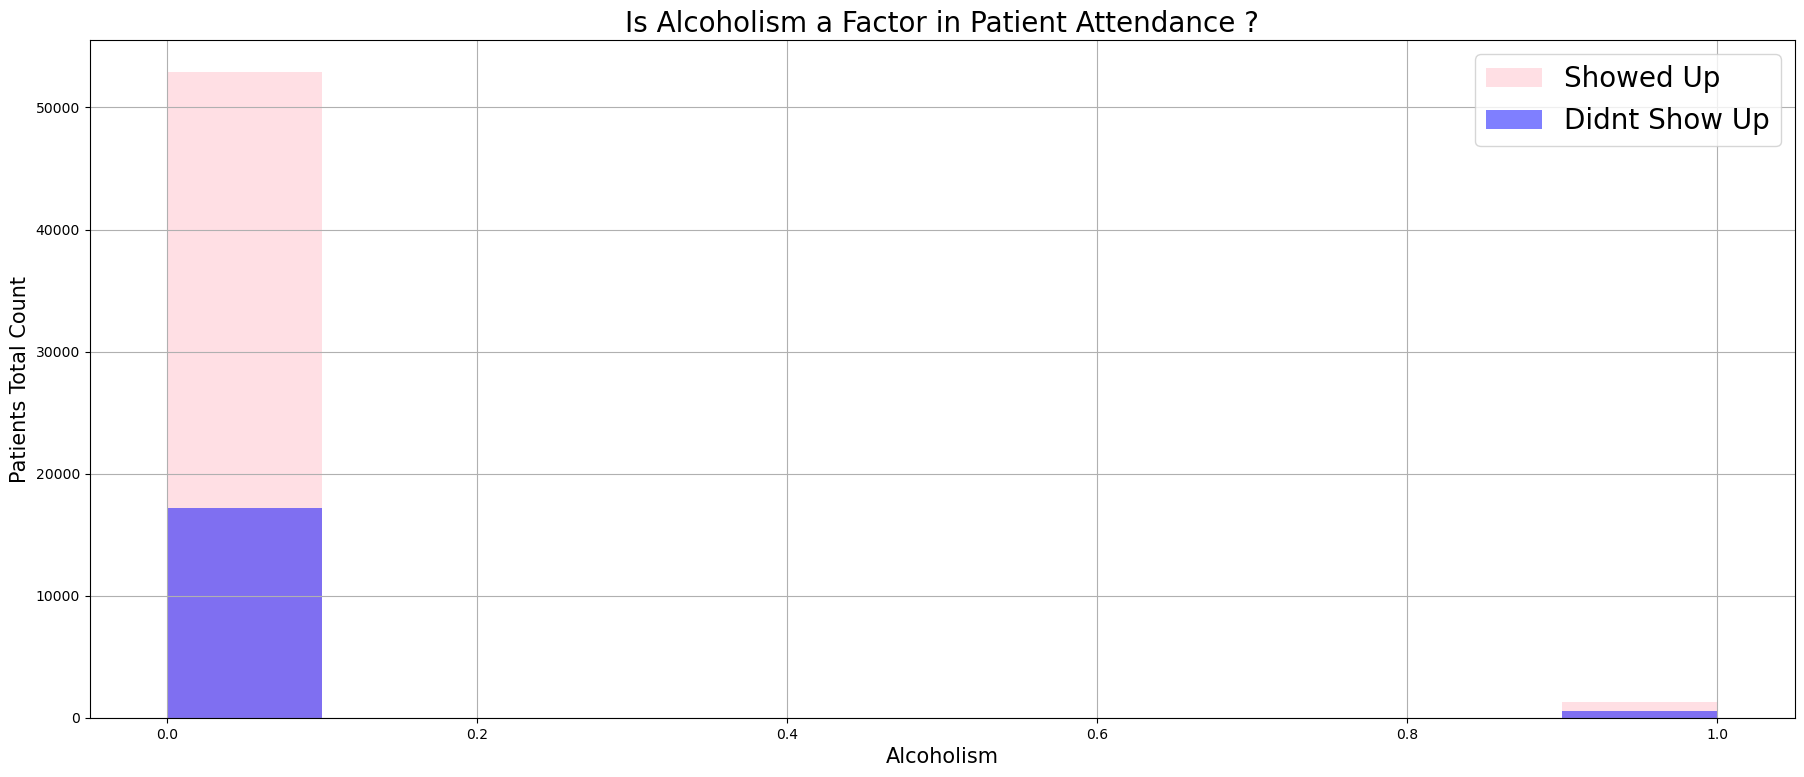

In [44]:
data_setup(df,'Alcoholism', show, no_show)

Based on the above data, we can not conclude whether `Alcoholism` specifically and `Mental Health Diagnosis` in general, are a factor or not in a patient's attendance. Seeing as there is not enough date to.

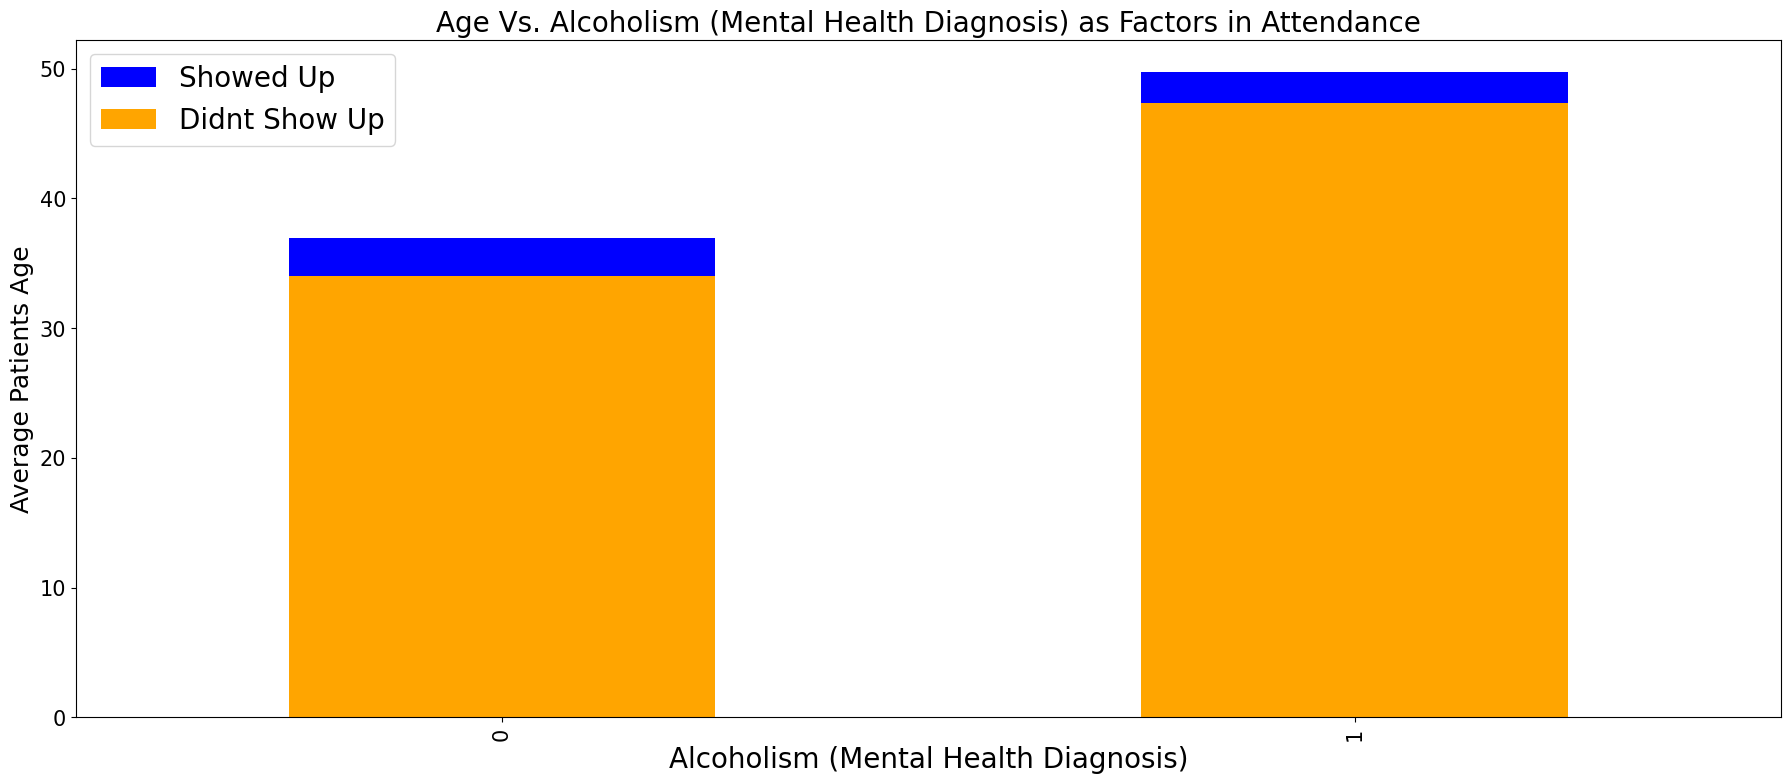

In [45]:
plt.figure(figsize=[22, 8.8])
df[show].groupby(['Alcoholism']).mean()['Age'].plot(kind = 'bar', color= 'blue', label= 'Showed Up', fontsize= 15)
df[no_show].groupby(['Alcoholism']).mean()['Age'].plot(kind = 'bar', color= 'orange', label= 'Didnt Show Up', fontsize= 15)
plt.legend(prop={'size':20});
plt.title('Age Vs. Alcoholism (Mental Health Diagnosis) as Factors in Attendance', fontsize= 20)
plt.xlabel('Alcoholism (Mental Health Diagnosis)', fontsize= 20)
plt.ylabel('Average Patients Age', fontsize= 18);

Since we do not have enough data to come to a conclusion about whether a `Mental Health Diagnosis` in general, `Alcoholism` in specific, has an impact on appointment attendance. `Age` is more of a factor for a patient's attendance in relation to `Alcoholism`. We can see in this graph above that patients who do suffer from `Alcoholism` have a worse attendance rate the older they get then their `Non Alcoholic` counter parts. This may be due to several Psychological & Phsyiological factors presented by the condition.

<a id='conclusions'></a>
## Conclusions

* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Age, Clinc Location, SMS Message Received

* Is the old adage true ? Is Gender really a factor on who has a higher probability for attending ?

Based on the available Data, the old adage does not hold. Men & Women showed an almost identical attendance rate to each other, with no gender superior to the other.

* Does the patient's age help us predict whether they will show for their appointments ?

Based on the results show form the dataset, we can confidently conclude that Age is the biggest factor in predicting whether a patient will show up to their appointment or not.

* Does the Patient's Age and whether they suffer from a Chronic Condition affect them showing up to their Appointment ?

Based on the available data, whether a patient has Chronic Condition(s), is not a factor on whether they will show up to their appointments.

* Does the Average Age in a Neighbourhood affect the Attendance Rate ?

As observed from the available data, both Age and Neighbourhood correlate together as factor on whether patients show up to their appointments or not.


* Is Age a factor for those who have a Scholarship when it comes to Attendance ?

Based on the available data, Age was not a facotr in attendance when it came to whether patients had Scholarships or not.

* Do SMS Messages play a role in Attendance ?

Contrary to popular belief, in the case of this dataset, SMS Messages played an inverse role on the number of patients who showed up. Where patients who did received a SMS Message and showed up for their appointments, where markedly lower than the patients who did not receive a SMS Message and showed up for their appointments. A revision of SMS Message Campign is highly recommended.

* Are Clinic Locations a Factor in Patients Attendance ?

It was observed, that there was a direct relationship between Clinc(s) Location(s) and whether the patients assoiciated with them showed up for their appointments.

* Is Mental Health a factor in Attendance ?

There was not enough data available to support whether Alcoholism was indeed a facotr affecting whether patients show up for their appointments or not.

On the other hand, within the available date, it was concluded that Age alongside Alcoholism play quite an important role on whether patients show up for their appointments or not.

>Limitations:
>>There was not enough data available to make an accurate analysis about `Mental Health` in general or in this case `Alcoholism`. Data was insufficient in both its volume and diversity when it came to this specific metric.

>> `Gender`, `Chronic Disease(s)`, and `subscription to a Scholarshoip` did not play signficant enough roles to help come up with better predications on the patients attendance rates.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

# List of Resources:

* www.stackoverflow.com
* https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f